In [5]:
import datetime as dt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os
import sys
import holidays


In [6]:
inventory_db = pd.read_csv('inventory.csv')
calendar_db = pd.read_csv('calendar.csv')
salesTest_db = pd.read_csv('sales_test.csv')
salesTrain_db = pd.read_csv('sales_train.csv')
test_weights = pd.read_csv('test_weights.csv')
solution_db = pd.read_csv('solution.csv')

In [52]:
print(calendar_db.head())

         date holiday_name  holiday  shops_closed  winter_school_holidays  \
0  2022-03-16          NaN        0             0                       0   
1  2020-03-22          NaN        0             0                       0   
2  2018-02-07          NaN        0             0                       0   
3  2018-08-10          NaN        0             0                       0   
4  2017-10-26          NaN        0             0                       0   

   school_holidays    warehouse  
0                0  Frankfurt_1  
1                0  Frankfurt_1  
2                0  Frankfurt_1  
3                0  Frankfurt_1  
4                0     Prague_2  


In [53]:
print("\nInventory Data:")
print(inventory_db.head())


Inventory Data:
   unique_id  product_unique_id        name  L1_category_name_en  \
0       5255               2583  Pastry_196               Bakery   
1       4948               2426     Herb_19  Fruit and vegetable   
2       2146               1079      Beet_2  Fruit and vegetable   
3        501                260  Chicken_13        Meat and fish   
4       4461               2197   Chicory_1  Fruit and vegetable   

         L2_category_name_en        L3_category_name_en  \
0               Bakery_L2_14               Bakery_L3_26   
1  Fruit and vegetable_L2_30  Fruit and vegetable_L3_86   
2   Fruit and vegetable_L2_3  Fruit and vegetable_L3_65   
3        Meat and fish_L2_13        Meat and fish_L3_27   
4  Fruit and vegetable_L2_17  Fruit and vegetable_L3_33   

         L4_category_name_en    warehouse  
0                Bakery_L4_1     Prague_3  
1   Fruit and vegetable_L4_1     Prague_3  
2  Fruit and vegetable_L4_34     Prague_1  
3         Meat and fish_L4_5     Prague_1  

In [54]:
print("\nSales Test Data:")
print(salesTest_db.head())


Sales Test Data:
   unique_id        date warehouse  total_orders  sell_price_main  \
0       1226  2024-06-03    Brno_1        8679.0            13.13   
1       1226  2024-06-11    Brno_1        8795.0            13.13   
2       1226  2024-06-13    Brno_1       10009.0            13.13   
3       1226  2024-06-15    Brno_1        8482.0            13.13   
4       1226  2024-06-09    Brno_1        8195.0            13.13   

   type_0_discount  type_1_discount  type_2_discount  type_3_discount  \
0          0.00000              0.0              0.0              0.0   
1          0.15873              0.0              0.0              0.0   
2          0.15873              0.0              0.0              0.0   
3          0.15873              0.0              0.0              0.0   
4          0.00000              0.0              0.0              0.0   

   type_4_discount  type_5_discount  type_6_discount  
0              0.0              0.0              0.0  
1              0.0

In [55]:
print("\nSales Train Data:")
print(salesTrain_db.head())


Sales Train Data:
   unique_id       date   warehouse  total_orders  sales  sell_price_main  \
0       4845 2024-03-10  Budapest_1        6436.0  16.34           646.26   
1       4845 2021-05-25  Budapest_1        4663.0  12.63           455.96   
2       4845 2021-12-20  Budapest_1        6507.0  34.55           455.96   
3       4845 2023-04-29  Budapest_1        5463.0  34.52           646.26   
4       4845 2022-04-01  Budapest_1        5997.0  35.92           486.41   

   availability  type_0_discount  type_1_discount  type_2_discount  \
0          1.00          0.00000              0.0              0.0   
1          1.00          0.00000              0.0              0.0   
2          1.00          0.00000              0.0              0.0   
3          0.96          0.20024              0.0              0.0   
4          1.00          0.00000              0.0              0.0   

   type_3_discount  type_4_discount  type_5_discount  type_6_discount  
0              0.0       

In [56]:
print("\nSolution Data:")
print(solution_db.head())


Solution Data:
                id  sales_hat
0  1226_2024-06-03          0
1  1226_2024-06-11          0
2  1226_2024-06-13          0
3  1226_2024-06-15          0
4  1226_2024-06-09          0


In [57]:
print('\n Test Weights Data:')
print(test_weights.head())


 Test Weights Data:
   unique_id    weight
0          0  2.535369
1          1  3.888933
2          2  5.885237
3          3  2.139552
4          5  3.021715


# Step 2 Check for Missing Values

In [58]:
print('\n Missing vales in Calendar Data:')
print(calendar_db.isnull().sum()) # is null function is used to check the missing values in the data


 Missing vales in Calendar Data:
date                          0
holiday_name              22086
holiday                       0
shops_closed                  0
winter_school_holidays        0
school_holidays               0
warehouse                     0
dtype: int64


In [60]:
print("\nMissing Values in Inventory Dataset:")
print(inventory_db.isnull().sum())




Missing Values in Inventory Dataset:
unique_id              0
product_unique_id      0
name                   0
L1_category_name_en    0
L2_category_name_en    0
L3_category_name_en    0
L4_category_name_en    0
warehouse              0
dtype: int64


In [61]:
print("\nMissing Values in Sales Test Data:")
print(salesTest_db.isnull().sum())




Missing Values in Sales Test Data:
unique_id          0
date               0
warehouse          0
total_orders       0
sell_price_main    0
type_0_discount    0
type_1_discount    0
type_2_discount    0
type_3_discount    0
type_4_discount    0
type_5_discount    0
type_6_discount    0
dtype: int64


In [62]:
print("\nMissing Values in Sales Train Data:")
print(salesTrain_db.isnull().sum())




Missing Values in Sales Train Data:
unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
availability        0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64


In [63]:
print("\nMissing Values in Solution Data:")
print(solution_db.isnull().sum())



Missing Values in Solution Data:
id           0
sales_hat    0
dtype: int64


# Step 3 : Data Distribution

In [64]:
print("\n Descritive Statistics of Sales Train Data:")
print(salesTrain_db.describe()) # decsribe statistics is used to get the statistical summary of the data


 Descritive Statistics of Sales Train Data:
          unique_id                           date  total_orders  \
count  4.007419e+06                        4007419  4.007367e+06   
mean   2.740801e+03  2022-09-17 11:44:05.398147328  5.995722e+03   
min    0.000000e+00            2020-08-01 00:00:00  4.580000e+02   
25%    1.398000e+03            2021-11-09 00:00:00  4.402000e+03   
50%    2.744000e+03            2022-10-23 00:00:00  5.515000e+03   
75%    4.084000e+03            2023-08-17 00:00:00  8.011000e+03   
max    5.431000e+03            2024-06-02 00:00:00  1.847500e+04   
std    1.558566e+03                            NaN  2.479598e+03   

              sales  sell_price_main  availability  type_0_discount  \
count  4.007367e+06     4.007419e+06  4.007419e+06     4.007419e+06   
mean   1.083808e+02     1.814199e+02  9.253107e-01     8.518626e-03   
min    0.000000e+00     2.000000e-02  1.000000e-02    -2.094930e+01   
25%    1.798000e+01     2.113000e+01  1.000000e+00     0.0

In [65]:
print("\n Descritive Statistics of Sales Test Data:")
print(salesTest_db.describe())


 Descritive Statistics of Sales Test Data:
          unique_id  total_orders  sell_price_main  type_0_discount  \
count  47021.000000  47021.000000     47021.000000     47021.000000   
mean    2749.678016   6880.911337       206.350987         0.013532   
std     1551.488719   2525.038306       525.128185         0.059923   
min        1.000000   1189.000000         0.130000         0.000000   
25%     1417.000000   5390.000000        20.110000         0.000000   
50%     2767.000000   6382.000000        49.040000         0.000000   
75%     4076.000000   8919.000000       120.580000         0.000000   
max     5431.000000  12374.000000     11084.520000         0.885580   

       type_1_discount  type_2_discount  type_3_discount  type_4_discount  \
count     47021.000000     47021.000000          47021.0     47021.000000   
mean          0.000251         0.004904              0.0         0.007142   
std           0.007095         0.028592              0.0         0.032099   
min     

In [66]:
print("\nSales Train Distribution by Warehouse:")
print(salesTrain_db['warehouse'].value_counts())


Sales Train Distribution by Warehouse:
warehouse
Prague_1       780566
Prague_3       779655
Prague_2       770709
Brno_1         643637
Budapest_1     574582
Munich_1       259333
Frankfurt_1    198937
Name: count, dtype: int64


In [7]:
# Set max rows to display the entire DataFrame
pd.options.display.max_rows = None
inventory_db.head(10)

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,5255,2583,Pastry_196,Bakery,Bakery_L2_14,Bakery_L3_26,Bakery_L4_1,Prague_3
1,4948,2426,Herb_19,Fruit and vegetable,Fruit and vegetable_L2_30,Fruit and vegetable_L3_86,Fruit and vegetable_L4_1,Prague_3
2,2146,1079,Beet_2,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_65,Fruit and vegetable_L4_34,Prague_1
3,501,260,Chicken_13,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_27,Meat and fish_L4_5,Prague_1
4,4461,2197,Chicory_1,Fruit and vegetable,Fruit and vegetable_L2_17,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1
5,4119,2024,Donut_32,Bakery,Bakery_L2_18,Bakery_L3_77,Bakery_L4_1,Budapest_1
6,1281,653,Salmon_3,Meat and fish,Meat and fish_L2_25,Meat and fish_L3_125,Meat and fish_L4_50,Prague_2
7,4975,2439,Chicken_93,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_32,Meat and fish_L4_7,Brno_1
8,5032,2465,Physalis_2,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_39,Fruit and vegetable_L4_26,Prague_2
9,240,120,Grape_2,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_57,Fruit and vegetable_L4_1,Munich_1


In [8]:
calendar_db.head(10)# this calendar_db has the dates and the events that happened on that day



,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2
5,2018-02-28,NaN,0,0,0,0,Prague_2
6,2019-02-19,NaN,0,0,0,0,Prague_2
7,2024-07-24,NaN,0,0,0,0,Brno_1
8,2018-07-11,NaN,0,0,0,0,Munich_1
9,2016-12-08,NaN,0,0,0,0,Munich_1


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






In [10]:
print(calendar_db.shape)

(23016, 7)


In [11]:
pd.options.display.max_rows = None
salesTest_db.head(10) # this salesTest_db has the dates and the events that happened on that , train data has the sales data, we need to predict the sales for the test data




,unique_id,date,warehouse,total_orders,sell_price_main,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,1226,2024-06-03,Brno_1,8679.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,1226,2024-06-11,Brno_1,8795.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
2,1226,2024-06-13,Brno_1,10009.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
3,1226,2024-06-15,Brno_1,8482.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
4,1226,2024-06-09,Brno_1,8195.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
5,1226,2024-06-06,Brno_1,9538.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
6,1226,2024-06-12,Brno_1,9002.0,13.13,0.15873,0.0,0.0,0.0,0.0,0.0,0.0
7,1226,2024-06-05,Brno_1,8501.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
8,1226,2024-06-04,Brno_1,8492.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
9,1226,2024-06-08,Brno_1,8093.0,13.13,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#count the number of rows in the salesTest_db
print(salesTest_db.shape)

(47021, 12)


In [28]:
salesTrain_db.head(10)






,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0
5,4845,2024-03-02,Budapest_1,6760.0,27.26,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
6,4845,2021-05-31,Budapest_1,4629.0,6.39,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
7,4845,2021-01-02,Budapest_1,4123.0,12.04,494.02,1.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
8,4845,2022-08-06,Budapest_1,4997.0,24.20,532.08,1.00,0.00000,0.0,0.0,0.0,0.15740,0.0,0.0
9,4845,2021-03-04,Budapest_1,6532.0,9.42,455.96,0.80,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0


(1402, 2)


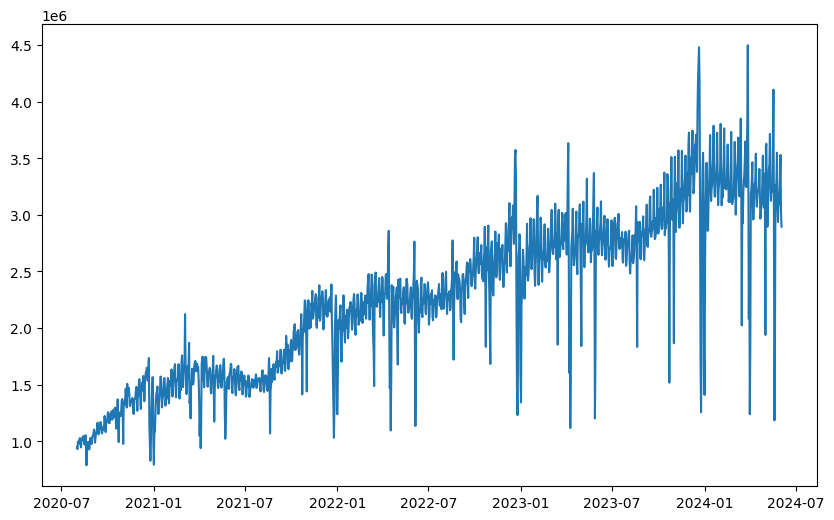

In [48]:
# Budapest_1 (total order in a time series)
# Filter rows where warehouse is Budapest_1

budapest_data = salesTrain_db[salesTrain_db['warehouse'] == 'Budapest_1']

# Group by date and sum the total order, (total order in a time series) this will reassign the index to the date(from 0 to n)
budapest_data = budapest_data.groupby('date')['total_orders'].sum().reset_index()


print(budapest_data.shape)

budapest_data.head(10)

# plot the total order in a time series

figure = plt.figure(figsize=(10, 6))
plt.plot(budapest_data['date'], budapest_data['total_orders'])







KeyboardInterrupt: 

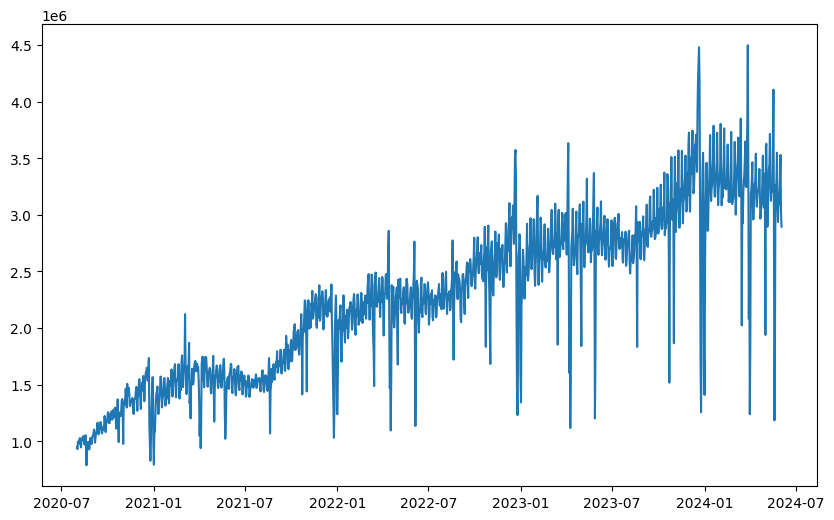

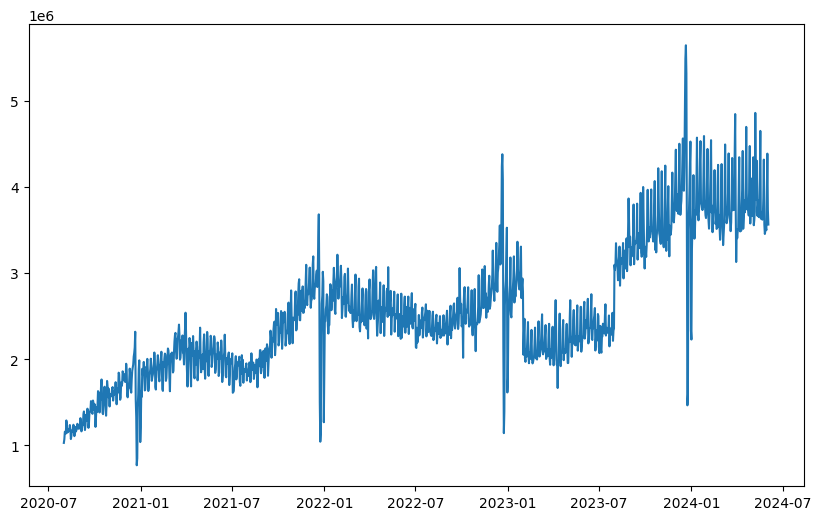

In [49]:
budapest_data = salesTrain_db[salesTrain_db['warehouse'] == 'Budapest_1']

#Finding every unique value in warehouse_id
salesTrain_db['warehouse'].unique()



for i in salesTrain_db['warehouse'].unique():
    temp_date = salesTrain_db[salesTrain_db['warehouse'] == i]
    temp_date = temp_date.groupby('date')['total_orders'].sum().reset_index()
    figure = plt.figure(figsize=(10, 6))
    plt.plot(temp_date['date'], temp_date['total_orders'])

        date  total_orders
0 2020-08-01      949747.0
1 2020-08-02      931297.0
2 2020-08-03      995527.0
3 2020-08-04      996964.0
4 2020-08-05      980096.0
5 2020-08-06     1018702.0
6 2020-08-07     1028221.0
7 2020-08-08      976147.0
8 2020-08-09      946256.0
9 2020-08-10     1010042.0


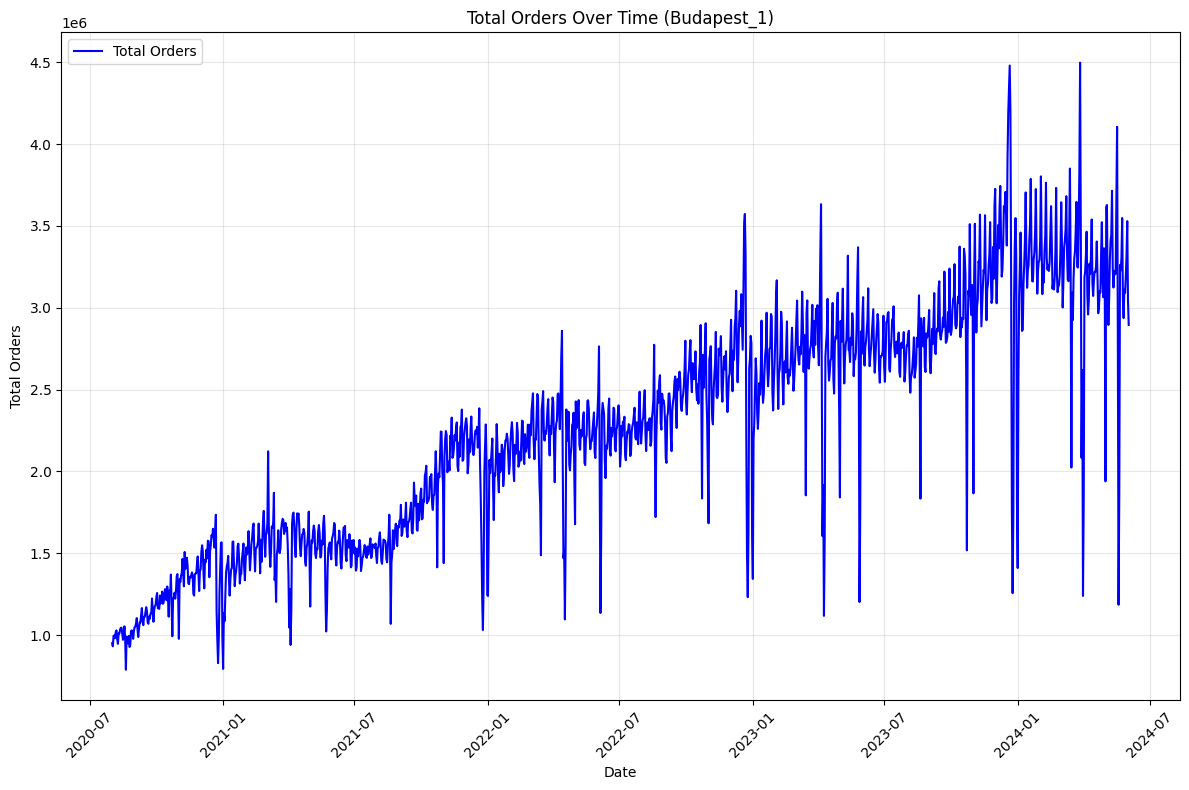

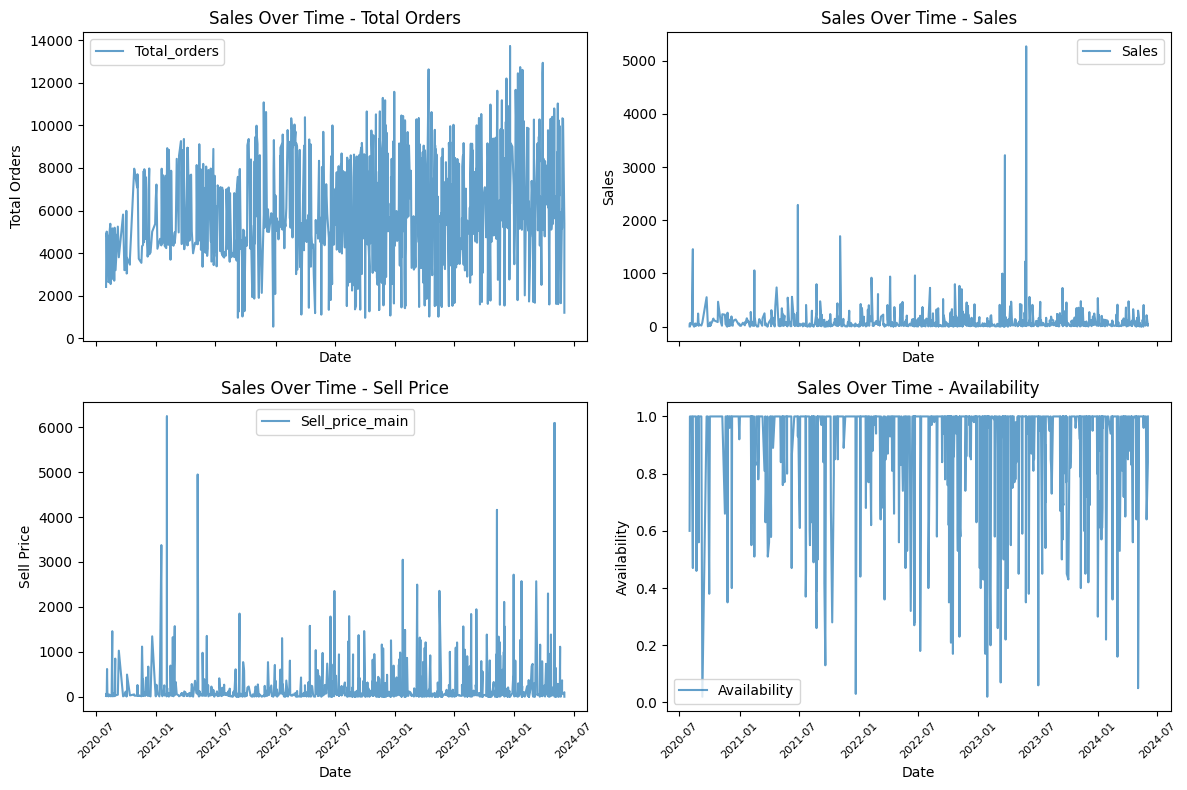

In [51]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming salesTrain_db is a DataFrame
# Ensure salesTrain_db is properly loaded before running this script

# Filter rows where warehouse is Budapest_1
budapest_data = salesTrain_db[salesTrain_db['warehouse'] == 'Budapest_1']

# Group by date and sum the total orders, resetting the index to 'date'
budapest_data = budapest_data.groupby('date')['total_orders'].sum().reset_index()

# Check the first 10 rows of the filtered and grouped data
print(budapest_data.head(10))

# Plot the total orders over time for Budapest_1
plt.figure(figsize=(12, 8))
plt.plot(pd.to_datetime(budapest_data['date']), budapest_data['total_orders'], label="Total Orders", color='blue')
plt.title("Total Orders Over Time (Budapest_1)")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Create a sample of 1000 rows from the salesTrain_db dataset
# Ensure 'date' is in datetime format for the sampled data
data = salesTrain_db
SD = data.sample(n=1000, random_state=42).sort_values(by='date')
SD['date'] = pd.to_datetime(SD['date'])

# Subplots with independent y-axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Titles for the subplots
titles = [
    "Sales Over Time - Total Orders",
    "Sales Over Time - Sales",
    "Sales Over Time - Sell Price",
    "Sales Over Time - Availability"
]

# Line plot for each metric
columns_to_plot = ["total_orders", "sales", "sell_price_main", "availability"]
y_labels = ["Total Orders", "Sales", "Sell Price", "Availability"]

# Iterate through subplots
for ax, title, column, ylabel in zip(axes.flatten(), titles, columns_to_plot, y_labels):
    if column in SD.columns:
        ax.plot(SD['date'], SD[column], label=column.capitalize(), alpha=0.7)
        ax.set_title(title)
        ax.set_xlabel("Date")
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', labelrotation=45, labelsize=8)
        ax.legend()
    else:
        # Handle missing columns gracefully
        ax.text(0.5, 0.5, f"Column '{column}' not found", ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f"Missing Data for {column}")
        ax.set_axis_off()

# Final adjustments and display
plt.tight_layout()
plt.show()


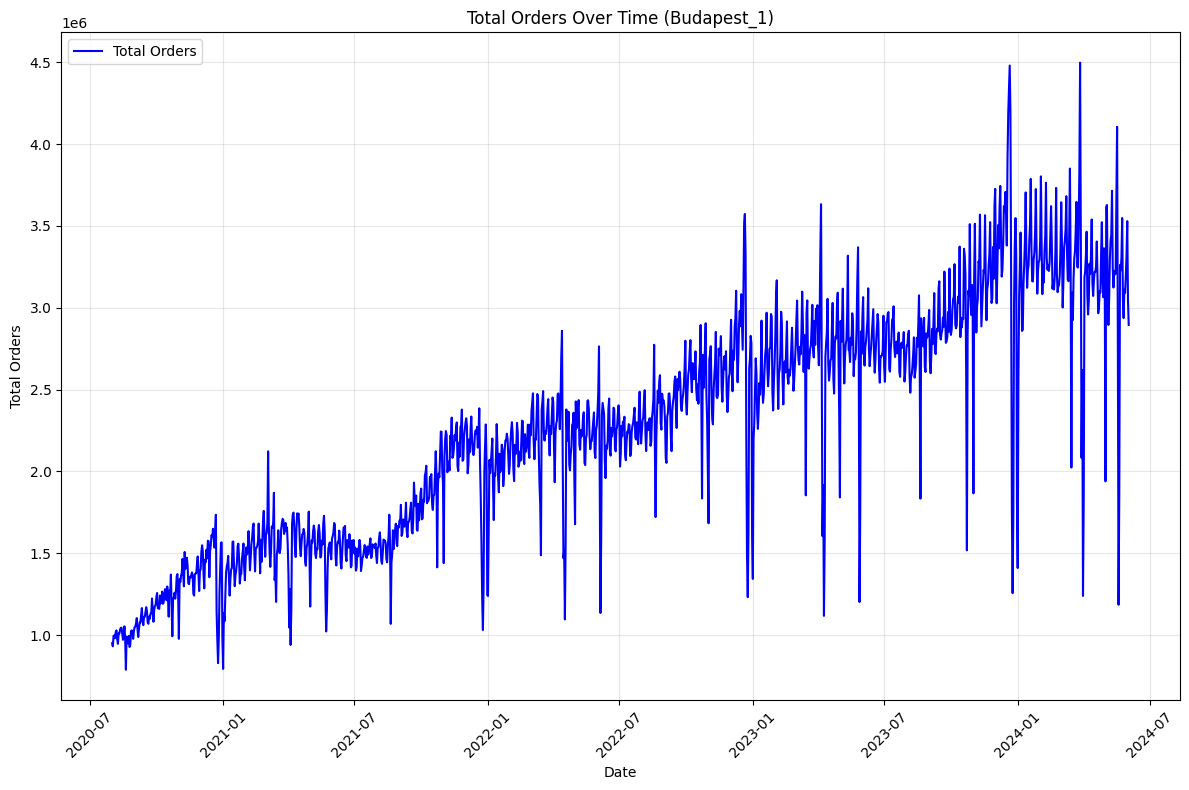

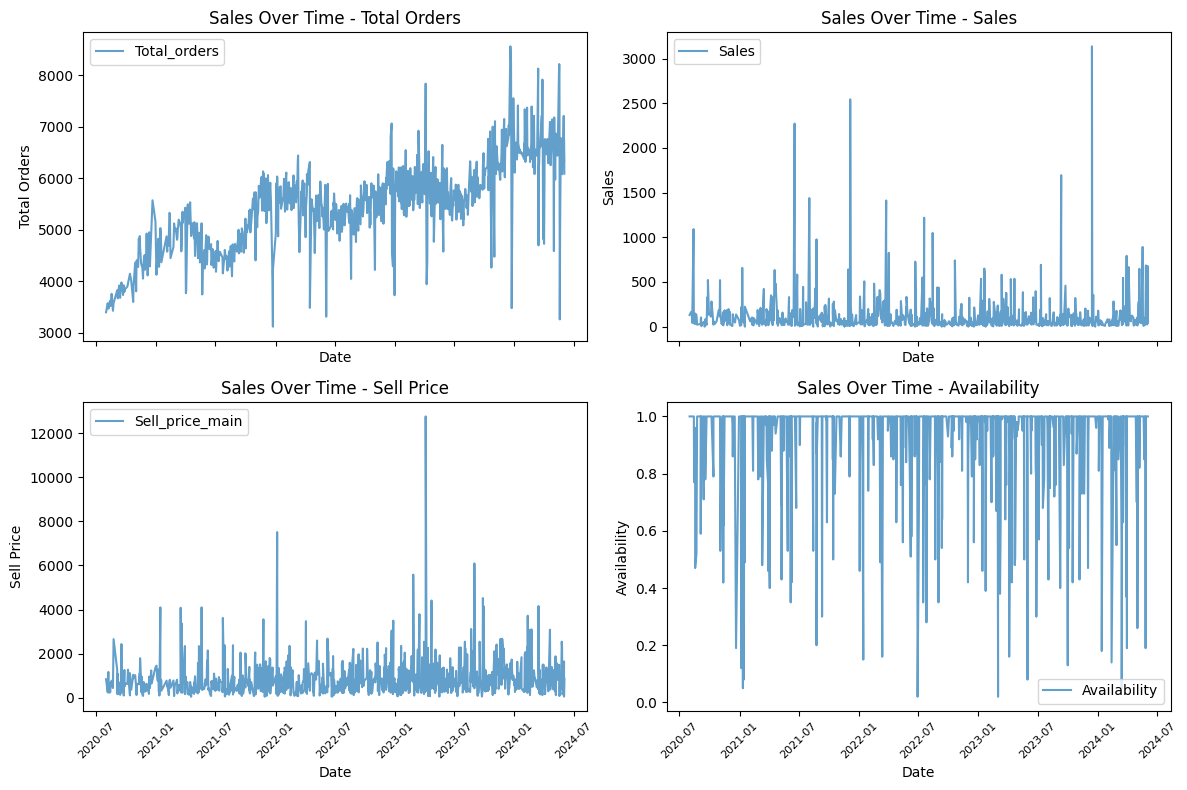

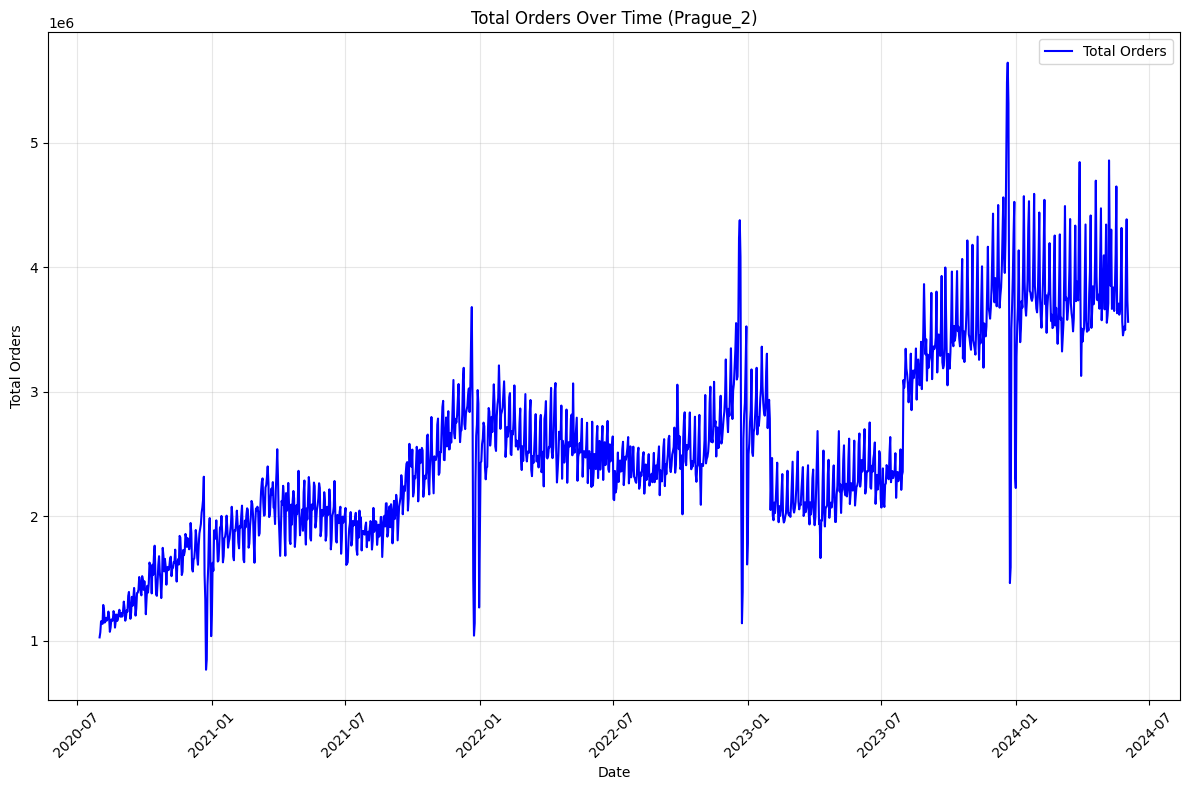

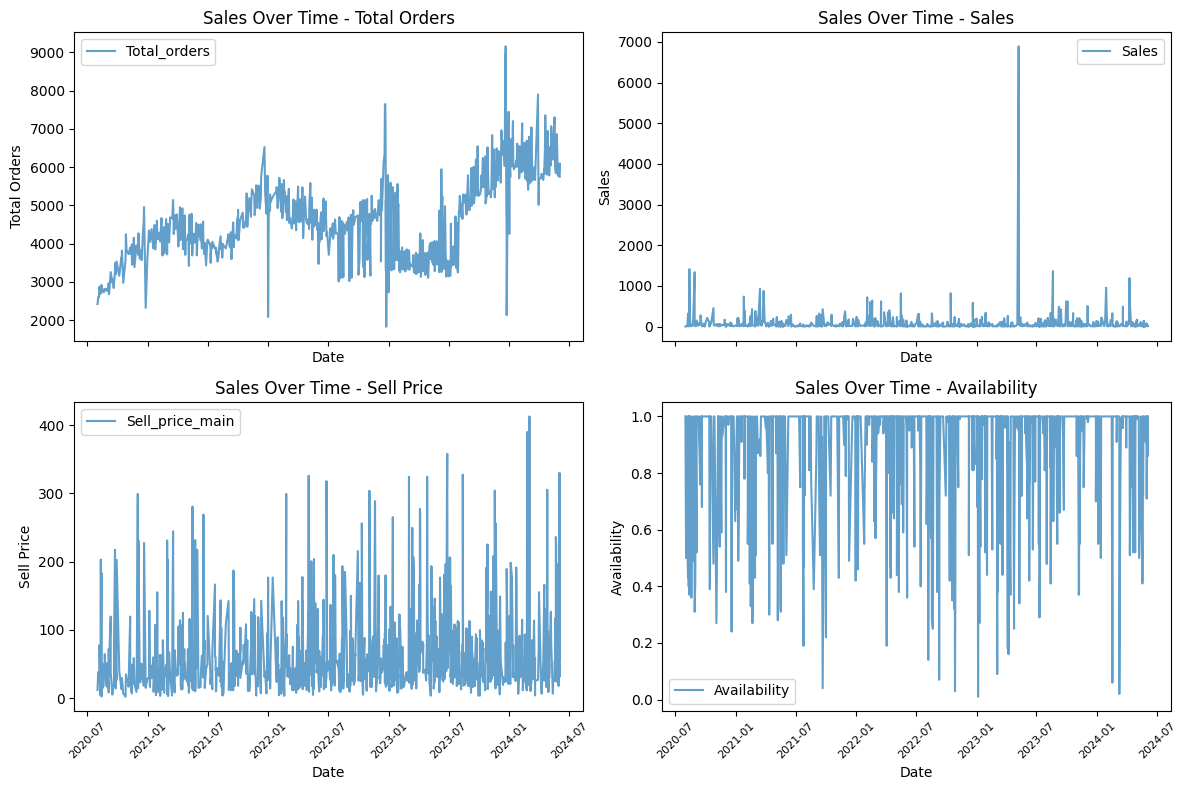

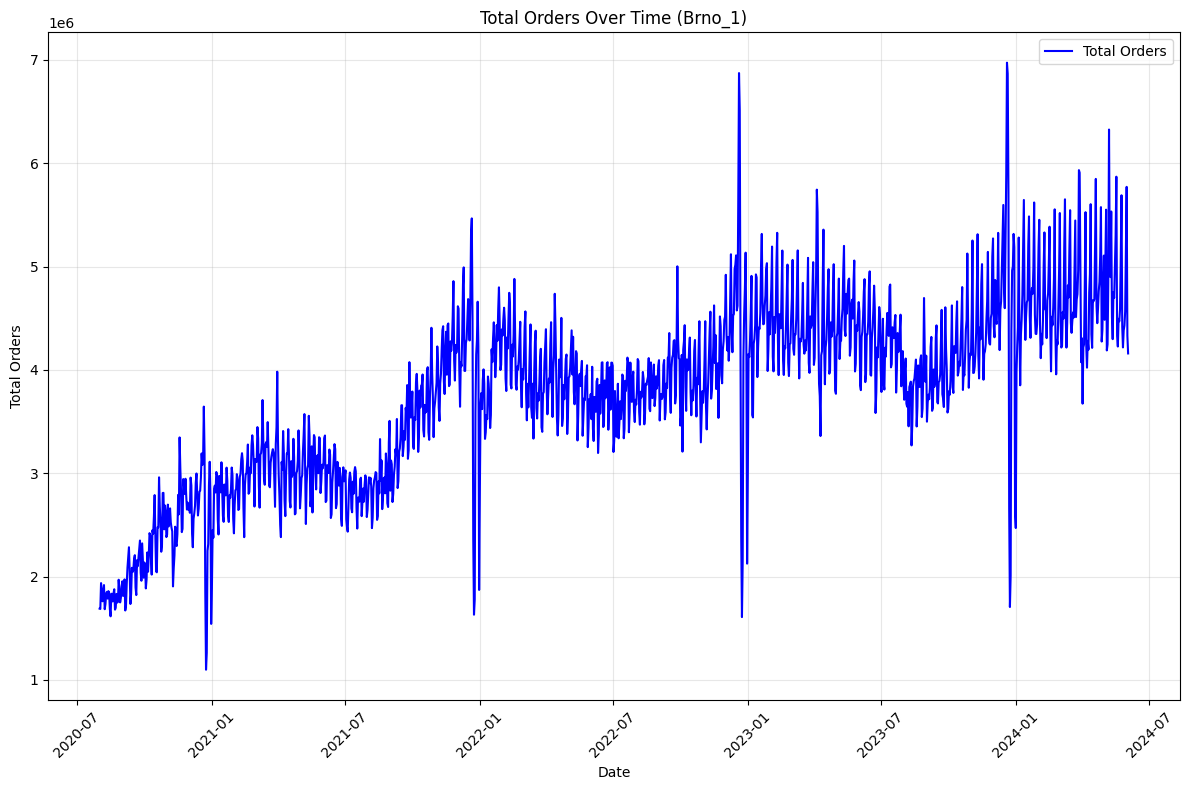

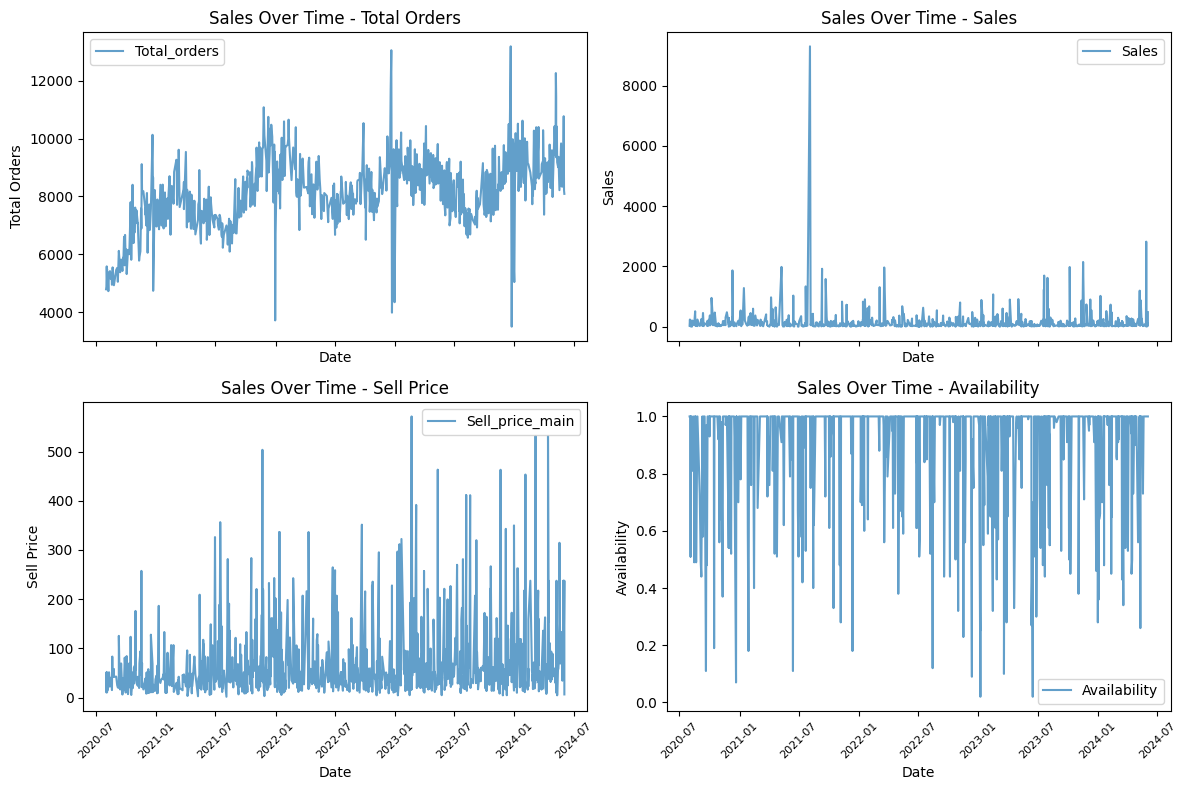

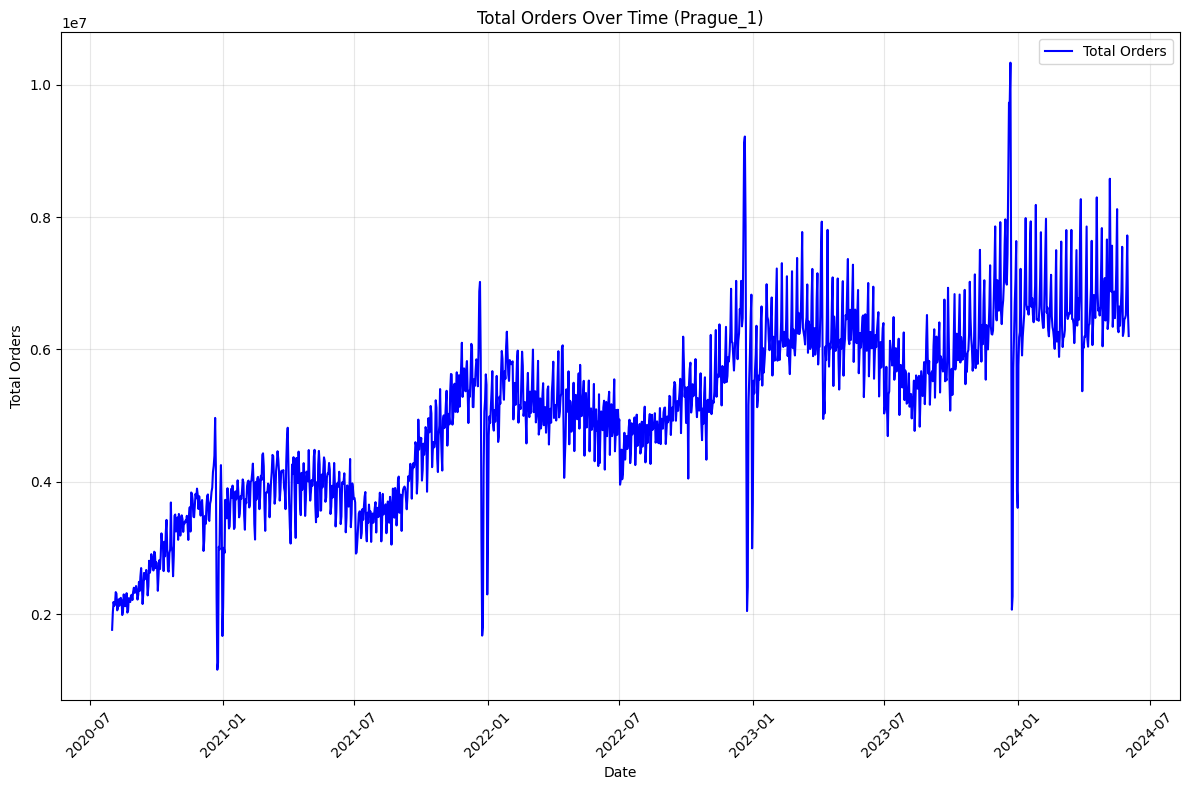

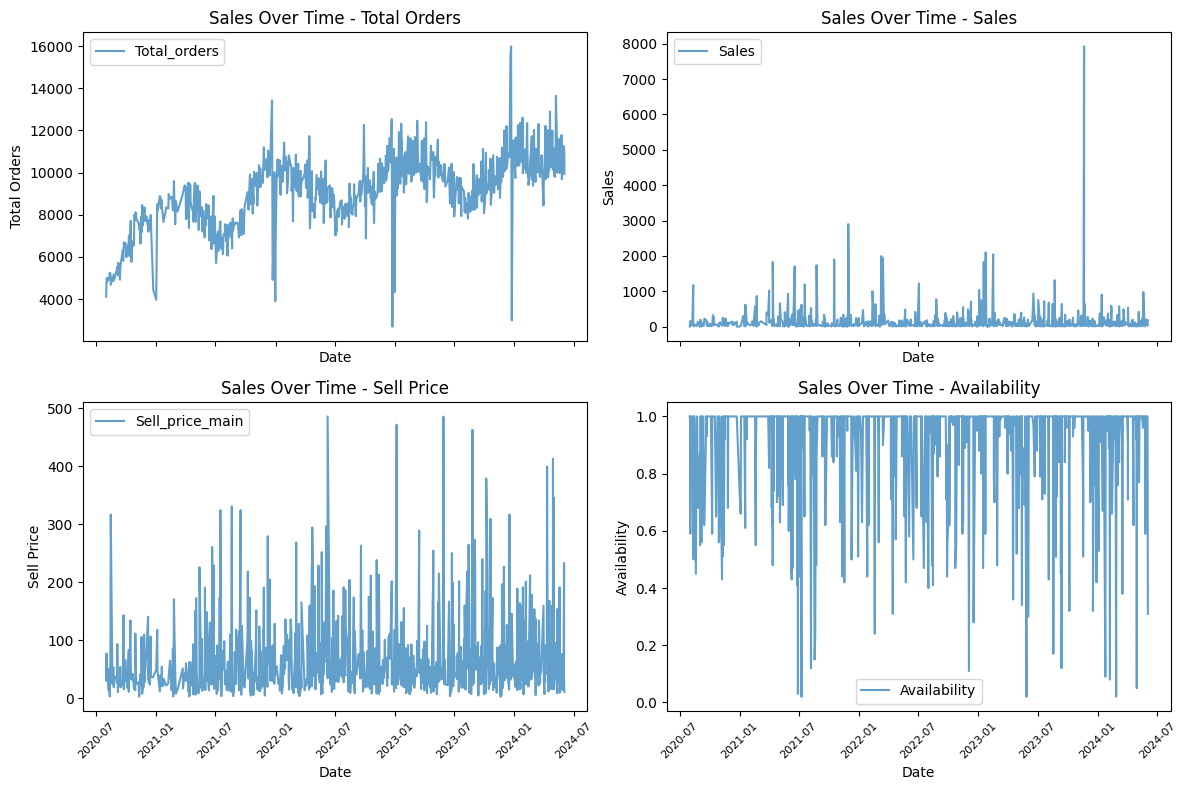

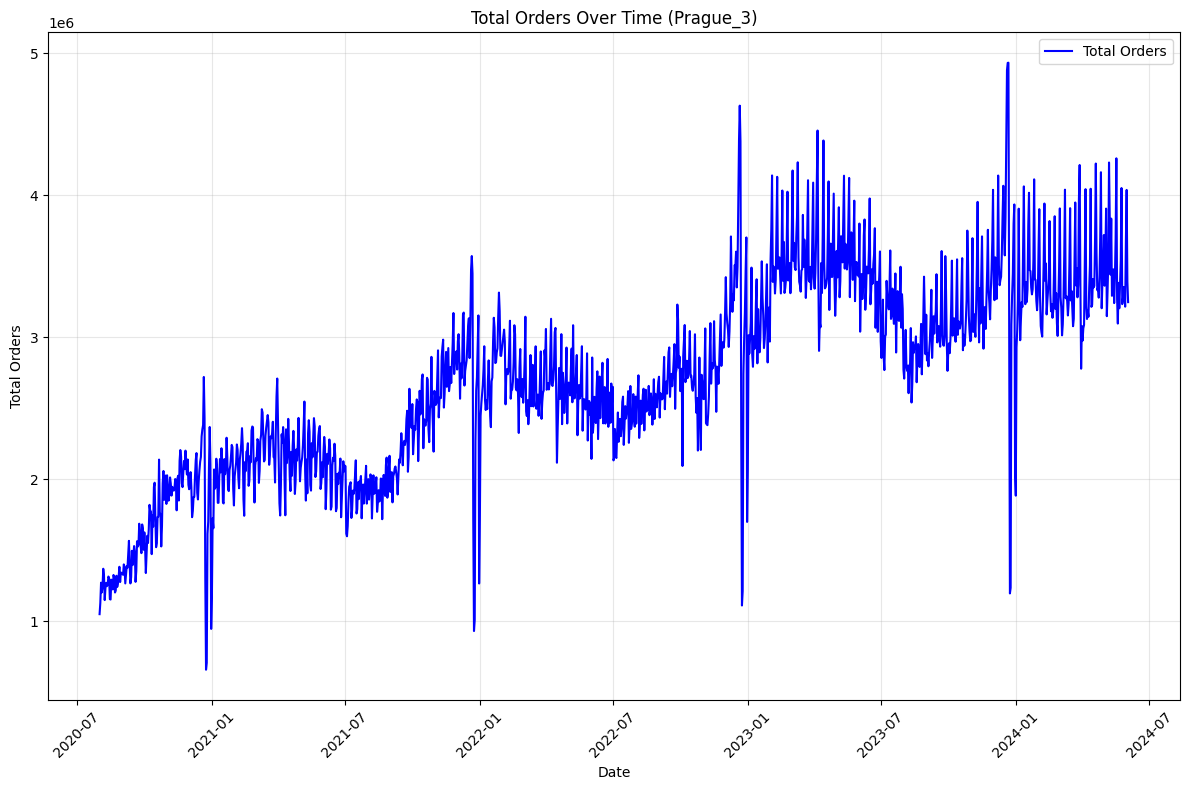

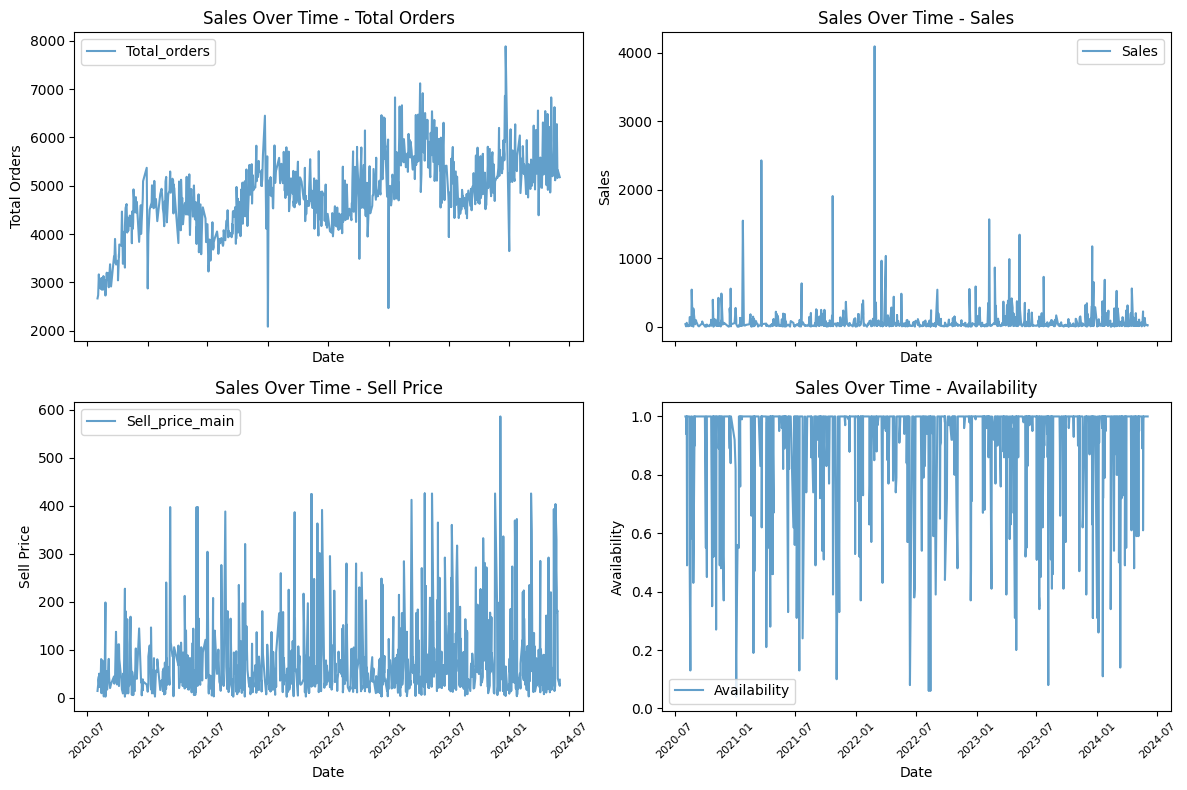

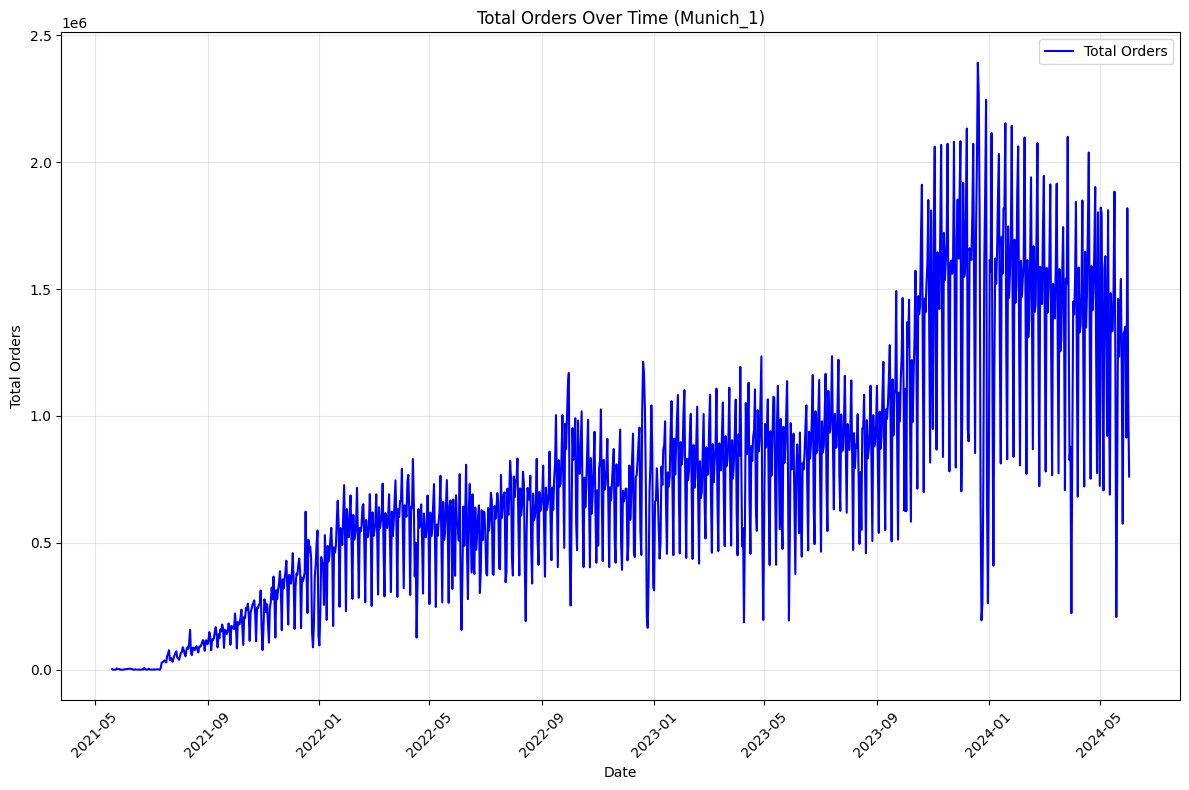

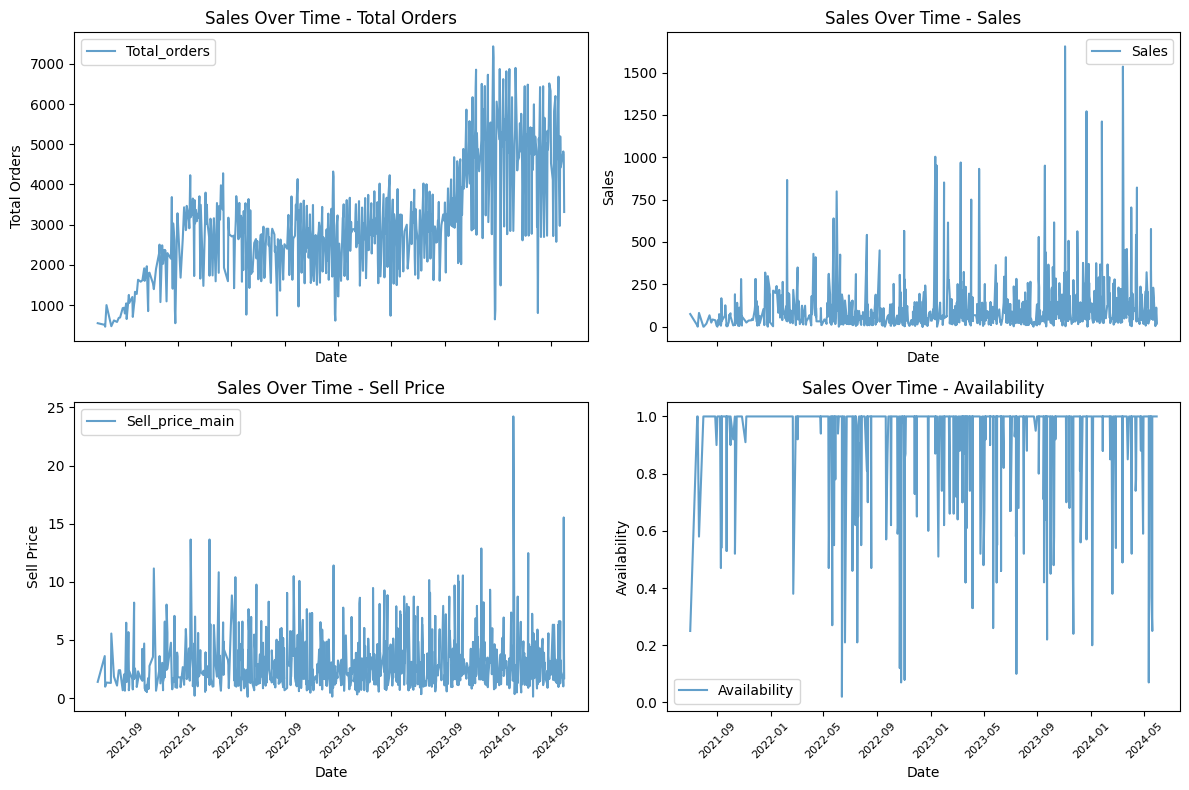

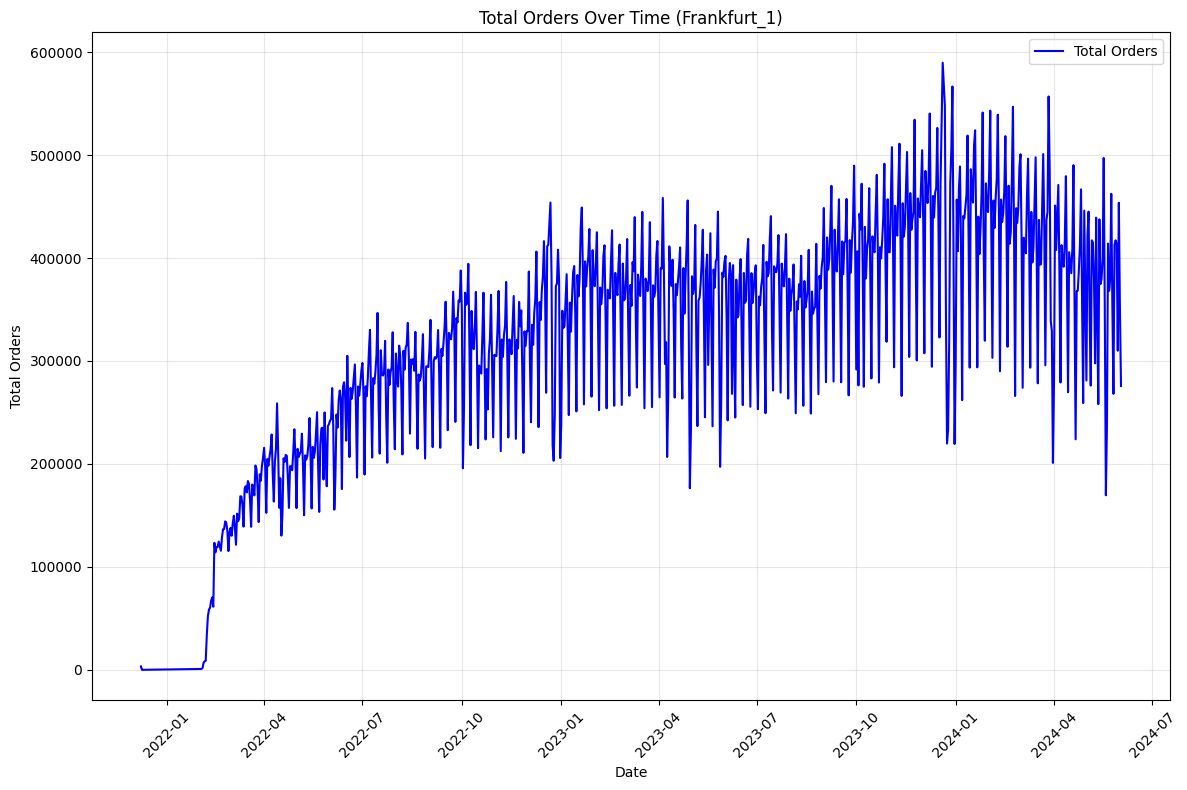

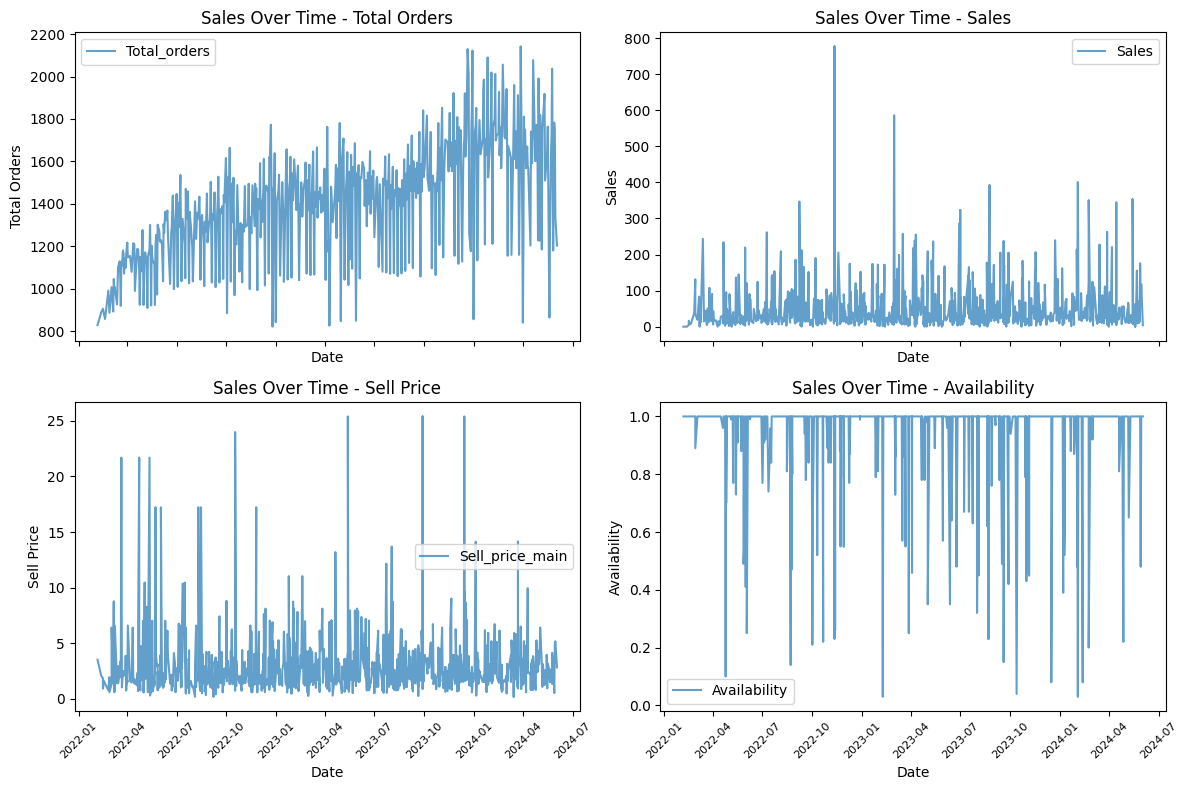

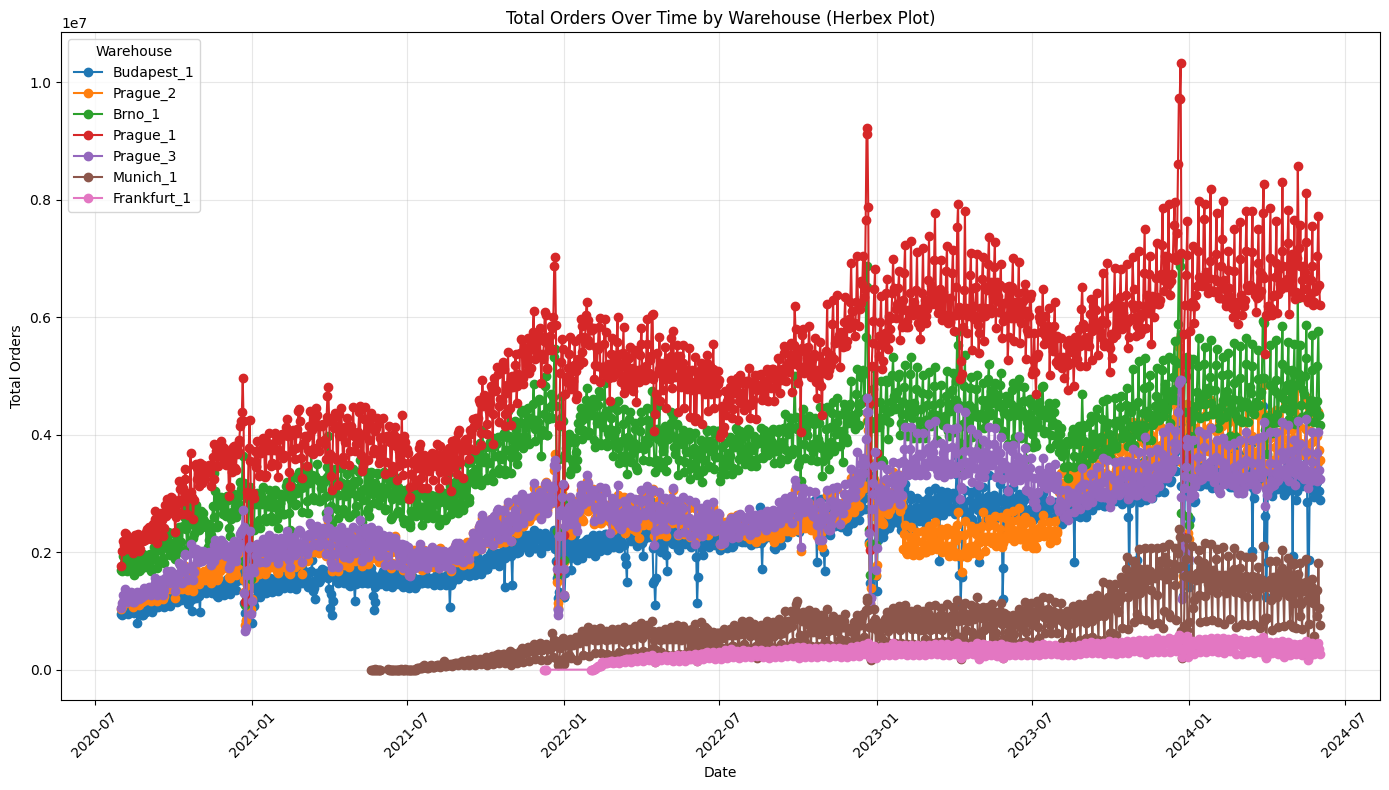

In [70]:
# List of warehouses to analyze
warehouses = ['Budapest_1', 'Prague_2', 'Brno_1', 'Prague_1', 'Prague_3', 'Munich_1', 'Frankfurt_1']

# Loop through each warehouse
for warehouse in warehouses:
    # Filter rows for the current warehouse
    warehouse_data = salesTrain_db[salesTrain_db['warehouse'] == warehouse]

    # Group by date and sum the total orders, resetting the index to 'date'
    warehouse_data_grouped = warehouse_data.groupby('date')['total_orders'].sum().reset_index()

    # Plot the total orders over time for the current warehouse
    plt.figure(figsize=(12, 8))
    plt.plot(pd.to_datetime(warehouse_data_grouped['date']), warehouse_data_grouped['total_orders'],
             label="Total Orders", color='blue')
    plt.title(f"Total Orders Over Time ({warehouse})")
    plt.xlabel("Date")
    plt.ylabel("Total Orders")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Create a sample of 1000 rows for the current warehouse
    warehouse_sample = warehouse_data.sample(n=min(1000, len(warehouse_data)), random_state=42).sort_values(by='date')
    warehouse_sample['date'] = pd.to_datetime(warehouse_sample['date'])

    # Subplots with independent y-axes
    fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
    plt.subplots_adjust(wspace=0.3, hspace=0.4)

    # Titles for the subplots
    titles = [
        "Sales Over Time - Total Orders",
        "Sales Over Time - Sales",
        "Sales Over Time - Sell Price",
        "Sales Over Time - Availability"
    ]

    # Line plot for each metric
    columns_to_plot = ["total_orders", "sales", "sell_price_main", "availability"]
    y_labels = ["Total Orders", "Sales", "Sell Price", "Availability"]

    # Iterate through subplots
    for ax, title, column, ylabel in zip(axes.flatten(), titles, columns_to_plot, y_labels):
        if column in warehouse_sample.columns:
            ax.plot(warehouse_sample['date'], warehouse_sample[column], label=column.capitalize(), alpha=0.7)
            ax.set_title(title)
            ax.set_xlabel("Date")
            ax.set_ylabel(ylabel)
            ax.tick_params(axis='x', labelrotation=45, labelsize=8)
            ax.legend()
        else:
            # Handle missing columns gracefully
            ax.text(0.5, 0.5, f"Column '{column}' not found", ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"Missing Data for {column}")
            ax.set_axis_off()

    # Final adjustments and display
    plt.tight_layout()
    plt.show()
    
    
    

# Convert 'date' column to datetime format
salesTrain_db['date'] = pd.to_datetime(salesTrain_db['date'])

# Filter data for relevant warehouses
filtered_data = salesTrain_db[salesTrain_db['warehouse'].isin(warehouses)]

# Plot Herbex-style chart
plt.figure(figsize=(14, 8))

# Iterate over warehouses and plot total_orders over time
for warehouse in warehouses:
    warehouse_data = filtered_data[filtered_data['warehouse'] == warehouse]
    warehouse_data_grouped = warehouse_data.groupby('date')['total_orders'].sum().reset_index()
    
    plt.plot(warehouse_data_grouped['date'], warehouse_data_grouped['total_orders'],
             label=warehouse, marker='o', linestyle='-')

# Customize the plot
plt.title("Total Orders Over Time by Warehouse (Herbex Plot)")
plt.xlabel("Date")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.legend(title="Warehouse")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [14]:
# plot all the warehouses and the total sales for each warehouse
warehouse_sales = salesTrain_db.groupby('warehouse')['sales'].sum().reset_index()

#counting the number of rows in the warehouse_sales
print(warehouse_sales.shape)

(7, 2)


In [15]:
#Finding every unique value in warehouse_id
salesTrain_db['warehouse'].unique()


array(['Budapest_1', 'Prague_2', 'Brno_1', 'Prague_1', 'Prague_3',
       'Munich_1', 'Frankfurt_1'], dtype=object)

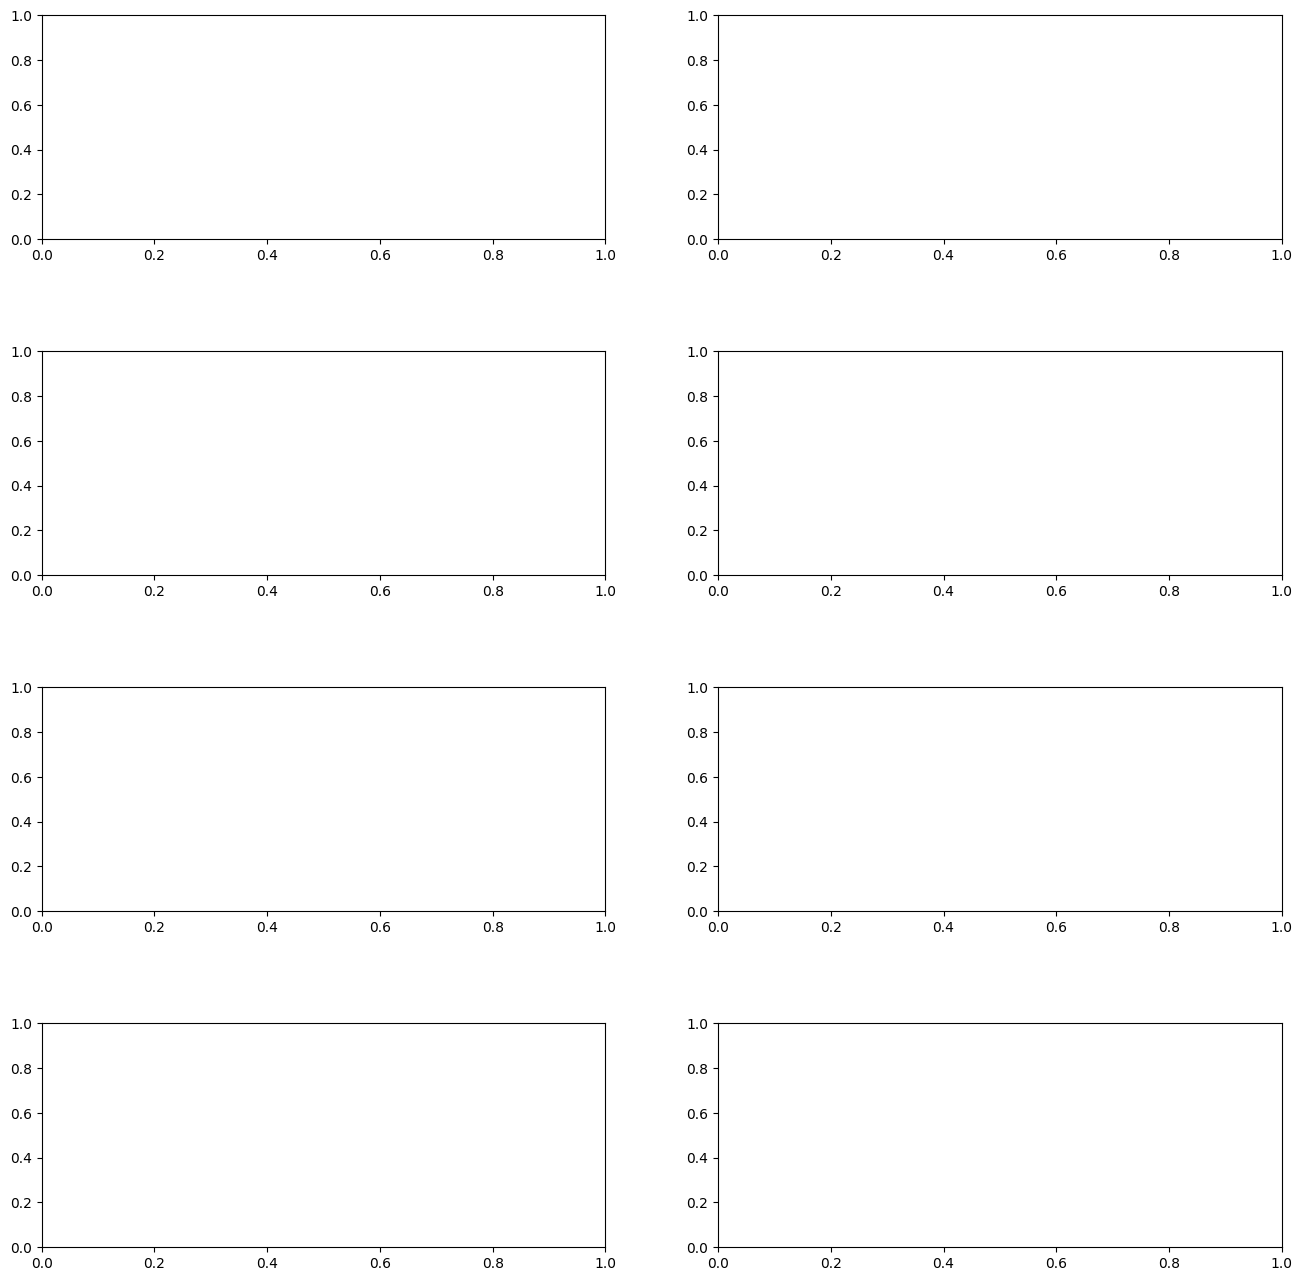

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16, 16))

# axis1 is the first subplot with Budapest_1 warehouse total sales data overtime	
ax1 = fig.add_subplot(4, 2, 1)



ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)
ax7 = fig.add_subplot(4, 2, 7)
ax8 = fig.add_subplot(4, 2, 8)


    
#Ajusting the space between the subplots
fig.subplots_adjust(wspace=0.2, hspace=0.5)  # Adjust horizontal and vertical space, wspace referst to width space and hspace refers to height space




In [17]:
# # Set array max rows to none
np.set_printoptions(threshold=sys.maxsize)
salesTest_db['unique_id'].unique()



array([1226, 5409, 1268, 1531,  655, 5142, 4072, 2163, 2829, 2091,  834,
       5239, 4536, 5358, 2764, 3259, 1481, 4871,  826, 2187, 5076, 1055,
        303, 1352, 1669, 4632, 1879,  330, 5276, 2688, 4045, 3776, 5279,
       4790, 3147, 4417, 1705, 2146, 2520, 2689, 5003, 5000, 3532, 4745,
       5010,  305, 2651, 1217, 3151,  364, 4134, 1774, 3715, 1693,  657,
       2872, 1801, 2913, 4814, 4155,  867, 3214, 2986, 4554, 2818, 4195,
       5120, 1675, 3046,  869, 2707, 2845, 2745, 3391, 3882,  445, 2950,
       4675,   39, 2850, 2045, 4295, 4219, 1715, 4228, 5327, 5134, 4290,
       3268,  219, 3659, 1426,  287,  106, 2358, 4042, 2847, 5147,  558,
       1754, 1835, 1233, 2066, 3546, 2376, 2223, 2923,   23, 2580, 2622,
       4434, 3155, 2386, 3495, 1770, 3535, 4562, 4132,  254, 2443,  648,
       3482, 3154, 3271,  828, 4415, 3732,  145,  281, 2355, 4221,  979,
       1643, 2952,   84, 1902, 3122, 2360, 5236,  398, 1314, 1155, 1280,
       3697, 4145, 2099, 2346, 3451, 1735, 2998, 11

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1200x800 with 1 Axes>

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1200x800 with 1 Axes>

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1200x800 with 1 Axes>

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1200x800 with 1 Axes>

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1200x800 with 1 Axes>

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1200x800 with 1 Axes>

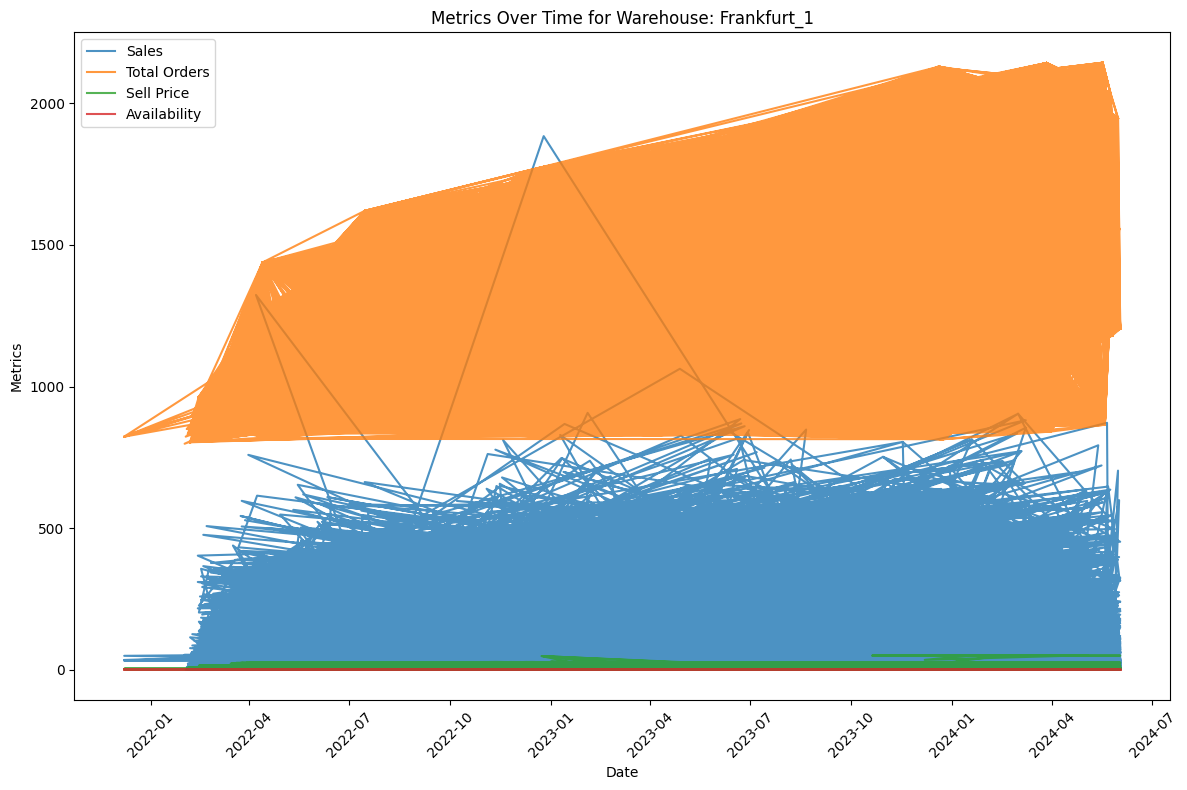

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming salesTrain_db is a DataFrame
# Ensure 'date' column is in datetime format
salesTrain_db['date'] = pd.to_datetime(salesTrain_db['date'])

# Iterate over each warehouse and plot metrics
for warehouse in salesTrain_db['warehouse'].unique():
    warehouse_sales = salesTrain_db[salesTrain_db['warehouse'] == warehouse]
    
    # Create a separate figure for each warehouse
    plt.figure(figsize=(12, 8))
    
    # Plot metrics
    plt.plot(warehouse_sales['date'], warehouse_sales['sales'], label="Sales", alpha=0.8)
    plt.plot(warehouse_sales['date'], warehouse_sales['total_orders'], label="Total Orders", alpha=0.8)
    plt.plot(warehouse_sales['date'], warehouse_sales['sell_price_main'], label="Sell Price", alpha=0.8)
    plt.plot(warehouse_sales['date'], warehouse_sales['availability'], label="Availability", alpha=0.8)
    
    # Set titles and labels
    plt.title(f"Metrics Over Time for Warehouse: {warehouse}")
    plt.xlabel("Date")
    plt.ylabel("Metrics")
    plt.xticks(rotation=45)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()


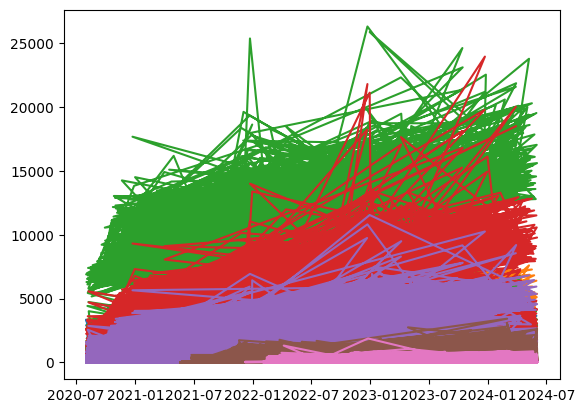

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plotting the sales for each warehouse

for warehouse in salesTrain_db['warehouse'].unique():
    warehouse_sales = salesTrain_db[salesTrain_db['warehouse'] == warehouse]
    plt.plot(warehouse_sales['date'], warehouse_sales['sales'], label=warehouse)
    

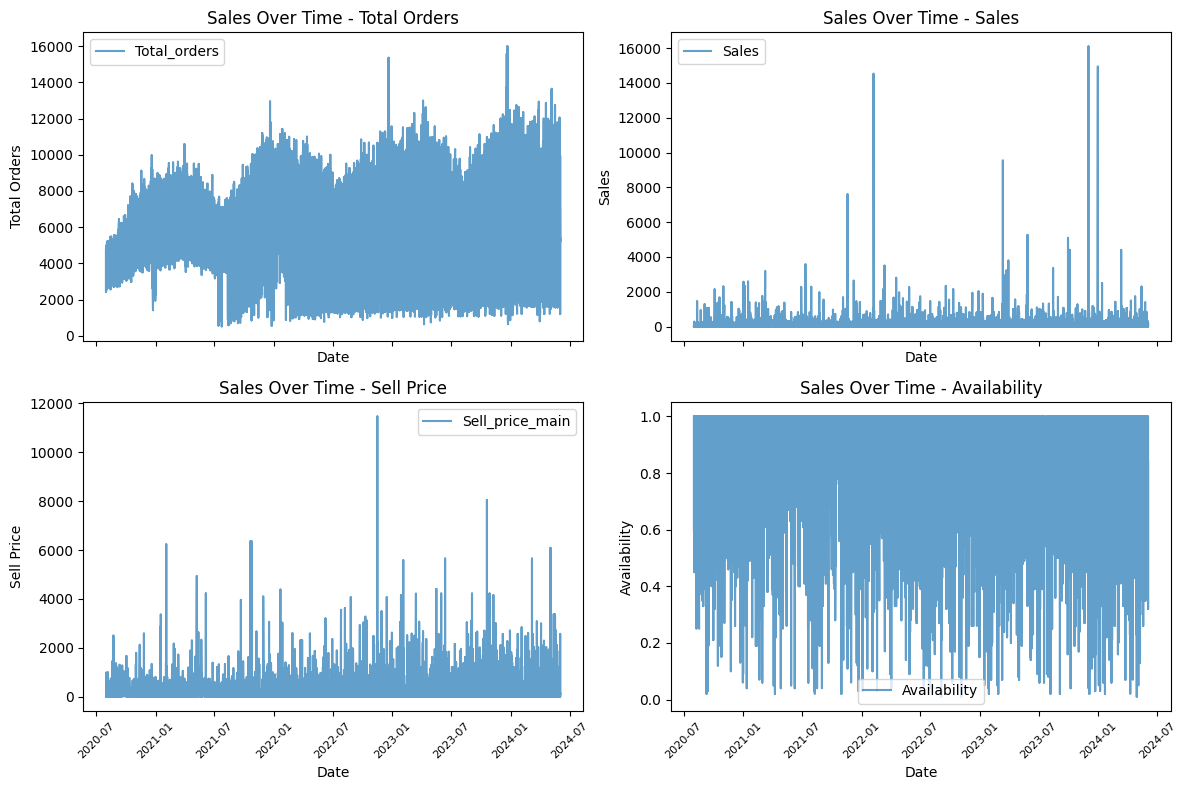

In [20]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming salesTrain_db is a DataFrame
data = salesTrain_db

# Create subplots with independent y-axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Take a sample of 1000 rows
SD = data.sample(n=10000, random_state=42).sort_values(by='date')

# Ensure 'date' is in datetime format for the sampled data
SD['date'] = pd.to_datetime(SD['date'])

# Titles for the subplots
titles = [
    "Sales Over Time - Total Orders",
    "Sales Over Time - Sales",
    "Sales Over Time - Sell Price",
    "Sales Over Time - Availability"
]

# Line plot for each metric
columns_to_plot = ["total_orders", "sales", "sell_price_main", "availability"]
y_labels = ["Total Orders", "Sales", "Sell Price", "Availability"]

for idx, (ax, title, column, ylabel) in enumerate(zip(axes.flatten(), titles, columns_to_plot, y_labels)):
    if column in SD.columns:
        ax.plot(SD['date'], SD[column], label=column.capitalize(), alpha=0.7)
        ax.set_title(title)
        ax.set_xlabel("Date")
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', labelrotation=45, labelsize=8)
        ax.legend()
    else:
        ax.text(0.5, 0.5, f"Column '{column}' not found", ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f"Missing Data for {column}")
        ax.set_axis_off()  # Turn off the axis for missing data

plt.tight_layout()
plt.show()


In [21]:
print(salesTest_db.shape)

(47021, 12)


In [22]:
test_weights.head(10)



,unique_id,weight
0,0,2.535369
1,1,3.888933
2,2,5.885237
3,3,2.139552
4,5,3.021715
5,6,3.806021
6,7,2.008733
7,8,3.006070
8,9,3.332580
9,10,2.254565


In [23]:
print(test_weights.shape)

(5390, 2)


In [24]:
solution_db.head(10)

,id,sales_hat
0,1226_2024-06-03,0
1,1226_2024-06-11,0
2,1226_2024-06-13,0
3,1226_2024-06-15,0
4,1226_2024-06-09,0
5,1226_2024-06-06,0
6,1226_2024-06-12,0
7,1226_2024-06-05,0
8,1226_2024-06-04,0
9,1226_2024-06-08,0


In [25]:
# Analyze the sales performance by product category



In [26]:
# test_weights.csv

# unique_id - inventory id for a single keeping unit
# weight - weight used for final metric computation

# calendar.csv

# warehouse - warehouse name
# date - date
# holiday_name - name of public holiday if any
# holiday - 0/1 indicating the presence of holidays
# shops_closed - public holiday with most of the shops or large part of shops closed
# winter_school_holidays - winter school holidays
# school_holidays - school holidays